Загрузка набора данных и подготовка его для классификации:
- бинарная (атака, нормальный трафик);
- мультиклассовая - 8 классов (7 классов атак, нормальный трафик);
- мультиклассовая - 34 класса (33 класса атак, нормальный трафик);

In [1]:
import numpy as np
import pandas as pd

import os
import pandas as pd
os.system('D:\\03.МФТИ\вкр\project\CICIoT_2023')
import data_convert

### Load data

In [80]:
directory = 'D:\\03.МФТИ\вкр\datasets\CIC_IOT_Dataset2023\csv\CICIoT2023\\'
# name_file = 'merged_4.csv'
name_file = 'part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'

full_name = directory + name_file
full_name

'D:\\03.МФТИ\\вкр\\datasets\\CIC_IOT_Dataset2023\\csv\\CICIoT2023\\part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'

In [3]:
def show_statistics_of_attacks(
    df: pd.DataFrame):
    
    # print all attacks
    attacks = []
    attacks = list(df['label'].unique()) 
    print('Count types of attacks:', len(attacks))
    print(attacks)

    # count the number of rows for each attack
    for label in attacks:
        print('{}:{}'.format(label, df[df['label'] == label].shape[0]))

    # print graph
    df['label'].value_counts().plot.bar();

#### Explore dataset for binary classification

In [4]:
# create dataframe for binary classification
df = pd.read_csv(full_name)
df_1 = data_convert.convert_type(df)
df_binary = data_convert.create_new_dataset(df_1, type_of_classification='binary',  is_write=True, directory=directory, output_file=name_file[:-4])
# df_binary.head(10)


D:\03.МФТИ\вкр\datasets\CIC_IOT_Dataset2023\csv\CICIoT2023\part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000_bin_decreased.csv is created


Count types of attacks: 2
['Attack', 'Benign']
Attack:213605
Benign:5200


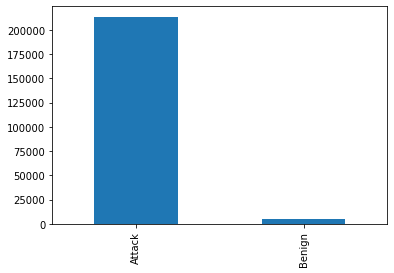

In [5]:
show_statistics_of_attacks(df_binary)

#### Explore dataset for multiclass classification (8 classes)

In [81]:
# create dataframe for multiclass classification (8 classes)
df = pd.read_csv(full_name)
df_1 = data_convert.convert_type(df)
df_8_multiclass = data_convert.create_new_dataset(df_1, type_of_classification='multiclass_8',  is_write=True, directory=directory, output_file=name_file[:-4])
# df_8_multiclass.head(10)

D:\03.МФТИ\вкр\datasets\CIC_IOT_Dataset2023\csv\CICIoT2023\part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000_8class_decreased.csv is created


Count types of attacks: 8
['DDos', 'Dos', 'Mirai', 'Benign', 'Spoofing', 'Recon', 'BrueForce', 'Web']
DDos:159409
Dos:37487
Mirai:12642
Benign:5200
Spoofing:2259
Recon:1629
BrueForce:57
Web:122


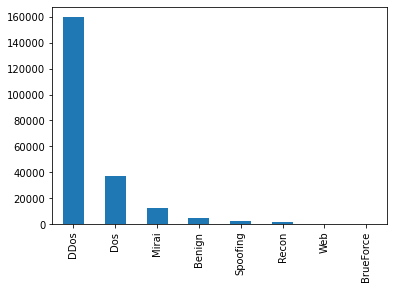

In [82]:
show_statistics_of_attacks(df_8_multiclass)

#### Explore dataset for multiclass classification (34 classes)

In [8]:
# create dataframe for multiclass classification (34 classes)
df = pd.read_csv(full_name)
df_1 = data_convert.convert_type(df)
df_34_multiclass = data_convert.create_new_dataset(df_1, type_of_classification='multiclass_34',  is_write=True, directory=directory, output_file=name_file[:-4])
# df_34_multiclass.head(10)

D:\03.МФТИ\вкр\datasets\CIC_IOT_Dataset2023\csv\CICIoT2023\part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000_34class_decreased.csv is created


Count types of attacks: 34
['DDoS-SYN_Flood', 'DDoS-TCP_Flood', 'DDoS-SynonymousIP_Flood', 'DDoS-UDP_Flood', 'DDoS-ICMP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood', 'DDoS-PSHACK_Flood', 'DDoS-RSTFINFlood', 'Mirai-greip_flood', 'Mirai-udpplain', 'BenignTraffic', 'DoS-TCP_Flood', 'DoS-UDP_Flood', 'DNS_Spoofing', 'MITM-ArpSpoofing', 'Recon-OSScan', 'Recon-HostDiscovery', 'DDoS-ACK_Fragmentation', 'DDoS-ICMP_Fragmentation', 'VulnerabilityScan', 'DDoS-UDP_Fragmentation', 'Recon-PortScan', 'DictionaryBruteForce', 'DoS-HTTP_Flood', 'Backdoor_Malware', 'DDoS-HTTP_Flood', 'DDoS-SlowLoris', 'Recon-PingSweep', 'SqlInjection', 'CommandInjection', 'BrowserHijacking', 'XSS', 'Uploading_Attack']
DDoS-SYN_Flood:19235
DDoS-TCP_Flood:20964
DDoS-SynonymousIP_Flood:16798
DDoS-UDP_Flood:25343
DDoS-ICMP_Flood:33529
DoS-SYN_Flood:9314
Mirai-greeth_flood:4728
DDoS-PSHACK_Flood:19373
DDoS-RSTFINFlood:19032
Mirai-greip_flood:3606
Mirai-udpplain:4308
BenignTraffic:5200
DoS-TCP_Flood:12326
DoS-UDP_Flood:15500
D

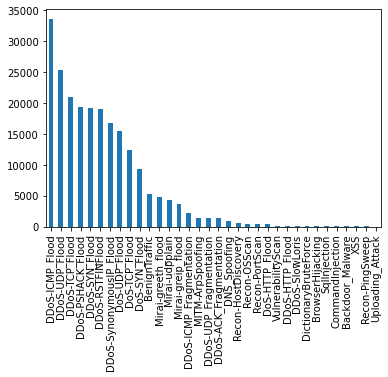

In [9]:
show_statistics_of_attacks(df_34_multiclass)

#### Types of protocols in datasets

In [10]:
df_34_multiclass=data_convert.iana_convert(df_34_multiclass)

<AxesSubplot:ylabel='protocol_type'>

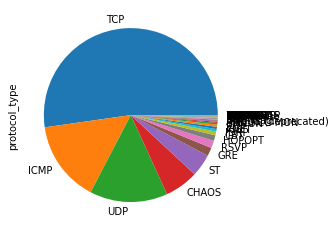

In [11]:
df_34_multiclass.protocol_type.unique
df_34_multiclass['protocol_type'].value_counts().plot.pie()